- https://youtu.be/Q_MbN-vu_2w?si=TrCYKV6q64rN6-Fq
- https://youtu.be/qBs29egdVNU?si=9X_UuFSqqsLBNndo
- https://youtu.be/cZ5w3b9ES7Q?si=NaiWh-SkPjqmKlmS

# [자전거 공유 수요](https://www.kaggle.com/competitions/bike-sharing-demand/overview)
워싱턴D.C 소재의 자전거 대여 스타트업의 데이터를 활용하여, 특정 시간대에 얼마나 많은 사람들이 자전거를 대여하는지 예측하는 것이 목표!!

## 평가지표 - RMSLE
Root Mean Squared Logarithmic Error

## [Data 설명](https://www.kaggle.com/competitions/bike-sharing-demand/data?select=sampleSubmission.csv)

### Features

- datetime:  
  - hourly date + timestamp  
- season(계절):  
  - 1 = spring
  - 2 = summer
  - 3 = fall
  - 4 = winter
- holiday(휴일):  
  - whether the day is considered a holiday
- workingday(근무일):
  - whether the day is neither a weekend nor holiday
- weather(날씨):
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp(온도):
  - temperature in Celsius
- atemp(체감온도):
  - "feels like" temperature in Celsius
- humidity(습도):
  - relative humidity
- windspeed(풍속):
  - wind speed

### Target

- count:
  - 총 대여 수
  - number of total rentals

참고용
- casual:
  - 미등록 사용자 대여 개시 수
  - number of non-registered user rentals initiated
- registered:
  - 등록 사용자 대여 개시
  -  number of registered user rentals initiated

# Import Library

In [ ]:
import os
import datetime

# 데이터 분석
import numpy as np
import pandas as pd
from scipy import stats

# 데이터 시각화
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.ion()
# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일 사용
plt.style.use('ggplot')



# 데이터 분리
from sklearn.model_selection import train_test_split


# warning
import warnings
warnings.filterwarnings('ignore')

## Connect to google account

In [ ]:
from google.colab import drive
drive.mount('/content/data')

Mounted at /content/data


# Global Variables

In [ ]:
import easydict
import json
args = easydict.EasyDict()

# path
args.default_path = '/content/data/MyDrive/google_lecture/05. machine learning/Projects/kaggle/bike_sharing_demand/data/'
args.train_path = args.default_path+'train.csv'
args.test_path = args.default_path+'test.csv'
args.submission_path = args.default_path+'sampleSubmission.csv'

args.SEED = 42

# Load Data

## train data

In [ ]:
train = pd.read_csv(args.train_path)

print(train.shape)
train.head(3)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [ ]:
train.tail(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


## test data

In [ ]:
test = pd.read_csv(args.test_path)

print(test.shape)
test.head(3)

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000


In [ ]:
test.tail(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981
6492,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981


## submission data

In [ ]:
submission = pd.read_csv(args.submission_path)

print(submission.shape)
submission.head(3)

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0


## 필요없는 컬럼제거

In [ ]:
print(train.shape)

remove_cols = list(set(train.columns) - set(test.columns))
remove_cols.remove('count') # target column
print(f'remove_cols: {remove_cols}')

train.drop(remove_cols, axis=1, inplace=True)
print(train.shape)
train.head()

(10886, 12)
remove_cols: ['registered', 'casual']
(10886, 10)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


# 데이터 타입

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   count       10886 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 850.6+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


## 날짜 데이터 타입으로 변경

In [ ]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(6)
memory usage: 850.6 KB


## datetime 변수 생성

In [ ]:
print(f'before: {train.shape}')

for data in [train]:
  data['year'] = data['datetime'].dt.year # 년도
  data['month'] = data['datetime'].dt.month # 월
  data['day'] = data['datetime'].dt.day # 일
  data['dayofweek'] = data['datetime'].dt.dayofweek # 요일
  data['quarter'] = data['datetime'].dt.quarter # 분기
  data['hour'] = data['datetime'].dt.hour # 시간
  data['minute'] = data['datetime'].dt.minute # 분
  data['second'] = data['datetime'].dt.second # 초

  data['weekend'] = data['dayofweek'].apply(lambda x: int(x in [5,6]))

train.drop(['datetime'], axis=1, inplace=True)
print(f'after: {train.shape}')

before: (10886, 10)
after: (10886, 18)


# Target

In [ ]:
train['count'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10886 entries, 0 to 10885
Series name: count
Non-Null Count  Dtype
--------------  -----
10886 non-null  int64
dtypes: int64(1)
memory usage: 85.2 KB


In [ ]:
train['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

<Axes: ylabel='count'>

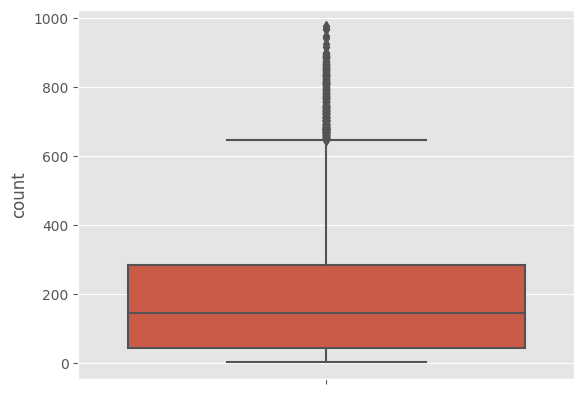

In [ ]:
sns.boxplot(data=train, y='count', orient='v')

<Axes: xlabel='count', ylabel='Count'>

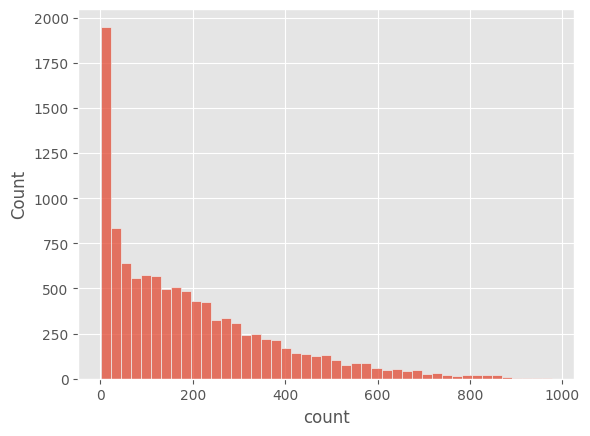

In [ ]:
sns.histplot(train['count'])

## 해석
왼쪽으로 치우처져있는 비대칭 그래프

# 결측치

In [ ]:
(train.isnull().sum() / train.shape[0]).round(4).sort_values(ascending=False) # 각 걸럼별 결측치 비율

season        0.0
holiday       0.0
second        0.0
minute        0.0
hour          0.0
quarter       0.0
dayofweek     0.0
day           0.0
month         0.0
year          0.0
count         0.0
windspeed     0.0
humidity      0.0
atemp         0.0
temp          0.0
weather       0.0
workingday    0.0
weekend       0.0
dtype: float64

In [ ]:
(test.isnull().sum() / test.shape[0]).round(4).sort_values(ascending=False) # 각 걸럼별 결측치 비율

datetime      0.0
season        0.0
holiday       0.0
workingday    0.0
weather       0.0
temp          0.0
atemp         0.0
humidity      0.0
windspeed     0.0
dtype: float64

## 해석
결측치 없음

# 수치형 데이터

## 왜도 & 첨도

- skewness(왜도) 해석
  - -0.5 ~ 0.5: 상당히 대칭적
  - -1 ~ -0.5 또는 0.5 ~ 1: 적당히 치우침
  - -1보다 작거나 1보다 큰경우: 상당치 치우팀

- kurtosis(첨도) 해석
  - Mesokurtic(kurtosis=3): 정규 분포와 유사한 첨도 통계량이다.
  - Leptokurtic(kurtosis>3): 피크는 Mesokurtic보다 높고 날카롭기 때문에 데이터는 꼬리가 무겁거나 특이치(outlier)가 많다는 것을 의미한다.
  - Platykurtic(kurtosis<3): 피크는 Mesokurtic보다 낮고 넓으며, 이는 데이터가 가벼운 편이나 특이치(outlier)가 부족하다는 것을 의미한다.

In [ ]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,dayofweek,quarter,hour,minute,second,weekend
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.0,10886.0,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132,2011.501929,6.521495,9.992559,3.013963,2.506614,11.541613,0.0,0.0,0.290557
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454,0.500019,3.444373,5.476608,2.004585,1.116174,6.915838,0.0,0.0,0.454040
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.0,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000,2011.000000,4.000000,5.000000,1.000000,2.000000,6.000000,0.0,0.0,0.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000,2012.000000,7.000000,10.000000,3.000000,3.000000,12.000000,0.0,0.0,0.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000,2012.000000,10.000000,15.000000,5.000000,4.000000,18.000000,0.0,0.0,1.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000,2012.000000,12.000000,19.000000,6.000000,4.000000,23.000000,0.0,0.0,1.000000


In [ ]:
cols = ['temp', 'atemp', 'humidity', 'windspeed']

for col in cols:
    _skew = train[col].skew()
    _kurt = train[col].kurt()

    print(f'{col}: skew({_skew:.2f}) / kurt({_kurt:.2f})')

temp: skew(0.00) / kurt(-0.91)
atemp: skew(-0.10) / kurt(-0.85)
humidity: skew(-0.09) / kurt(-0.76)
windspeed: skew(0.59) / kurt(0.63)


<Axes: xlabel='windspeed', ylabel='count'>

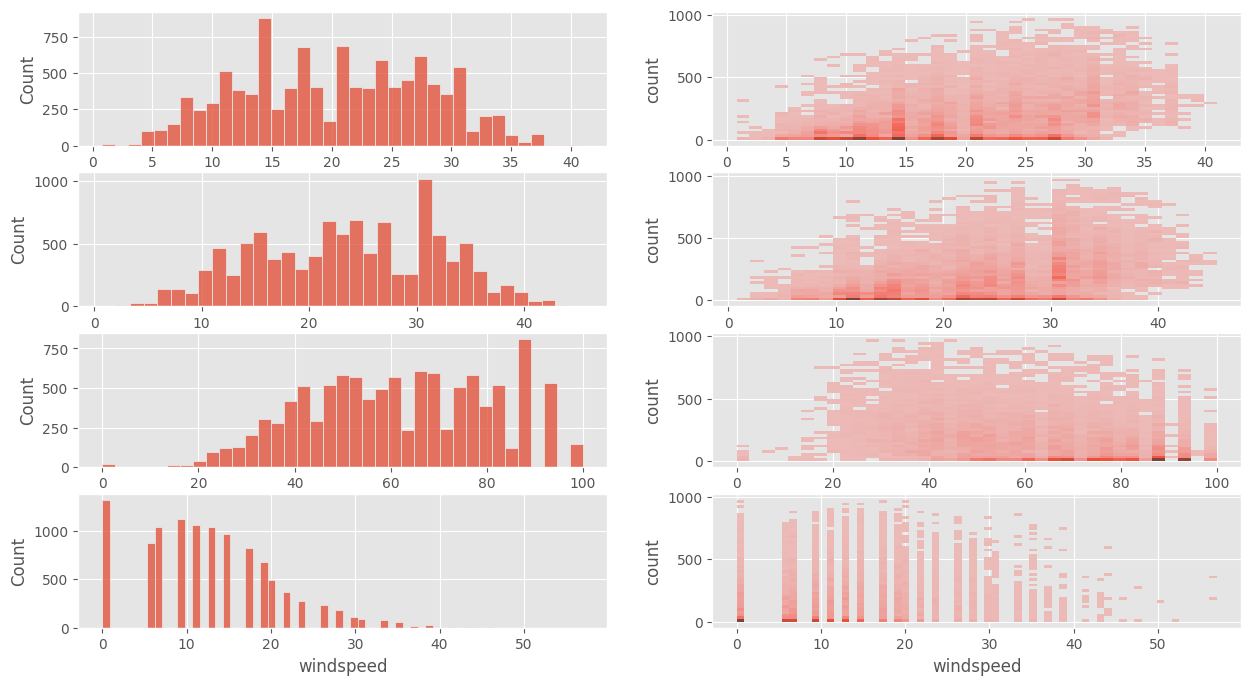

In [ ]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(15,8)

sns.histplot(data=train, x='temp', ax=ax1)
sns.histplot(data=train, y='count', x='temp', ax=ax2)

sns.histplot(data=train, x='atemp', ax=ax3)
sns.histplot(data=train, y='count', x='atemp', ax=ax4)

sns.histplot(data=train, x='humidity', ax=ax5)
sns.histplot(data=train, y='count', x='humidity', ax=ax6)

sns.histplot(data=train, x='windspeed', ax=ax7)
sns.histplot(data=train, y='count', x='windspeed', ax=ax8)

<Axes: xlabel='humidity', ylabel='count'>

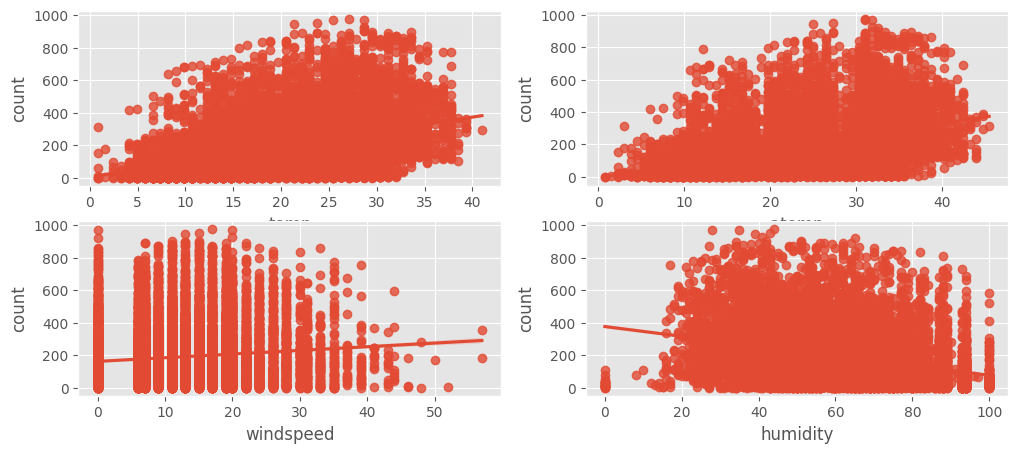

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12,5)

sns.regplot(data=train, x='temp', y='count', ax=ax1)
sns.regplot(data=train, x='atemp', y='count', ax=ax2)
sns.regplot(data=train, x='windspeed', y='count', ax=ax3)
sns.regplot(data=train, x='humidity', y='count', ax=ax4)

- windspeed

<Axes: xlabel='windspeed', ylabel='count'>

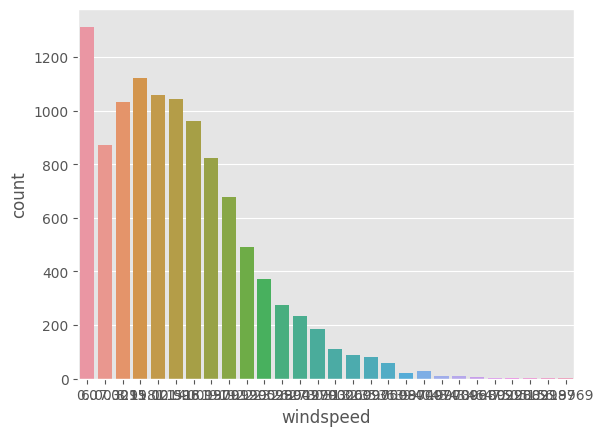

In [ ]:
sns.countplot(data=train, x='windspeed')

### 해석
- 왜도, 첨도가 심한 데이터는 없음
- windspeed는 범주형 데이터인 것 같음
- windspeed의 0값이 너무 많음

# 범주형 데이터

In [ ]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,dayofweek,quarter,hour,minute,second,weekend
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.0,10886.0,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132,2011.501929,6.521495,9.992559,3.013963,2.506614,11.541613,0.0,0.0,0.290557
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454,0.500019,3.444373,5.476608,2.004585,1.116174,6.915838,0.0,0.0,0.454040
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.0,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000,2011.000000,4.000000,5.000000,1.000000,2.000000,6.000000,0.0,0.0,0.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000,2012.000000,7.000000,10.000000,3.000000,3.000000,12.000000,0.0,0.0,0.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000,2012.000000,10.000000,15.000000,5.000000,4.000000,18.000000,0.0,0.0,1.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000,2012.000000,12.000000,19.000000,6.000000,4.000000,23.000000,0.0,0.0,1.000000


In [ ]:
cat_cols = list(set(train.columns) - set(['temp', 'atemp', 'humidity']))
cat_cols

['workingday',
 'hour',
 'year',
 'weekend',
 'day',
 'windspeed',
 'count',
 'season',
 'month',
 'second',
 'weather',
 'minute',
 'holiday',
 'quarter',
 'dayofweek']

In [ ]:
df_cat = train[cat_cols]
for col in df_cat.columns:
    df_cat[col] = df_cat[col].astype('category')

df_cat['count'] = df_cat['count'].astype('int')
print(f'{df_cat.shape}')
df_cat.head(3)

(10886, 15)


,workingday,hour,year,weekend,day,windspeed,count,season,month,second,weather,minute,holiday,quarter,dayofweek
0,0,0,2011,1,1,0.0,16,1,1,0,1,0,0,1,5
1,0,1,2011,1,1,0.0,40,1,1,0,1,0,0,1,5
2,0,2,2011,1,1,0.0,32,1,1,0,1,0,0,1,5


## 범주형 분석

In [ ]:
df_cat.describe(exclude=np.number)

,workingday,hour,year,weekend,day,windspeed,season,month,second,weather,minute,holiday,quarter,dayofweek
count,10886,10886,10886,10886,10886,10886.0,10886,10886,10886,10886,10886,10886,10886,10886
unique,2,24,2,2,19,28.0,4,12,1,4,1,2,4,7
top,1,12,2012,0,1,0.0,4,5,0,1,0,0,4,5
freq,7412,456,5464,7723,575,1313.0,2734,912,10886,7192,10886,10575,2734,1584


<Axes: xlabel='weather', ylabel='count'>

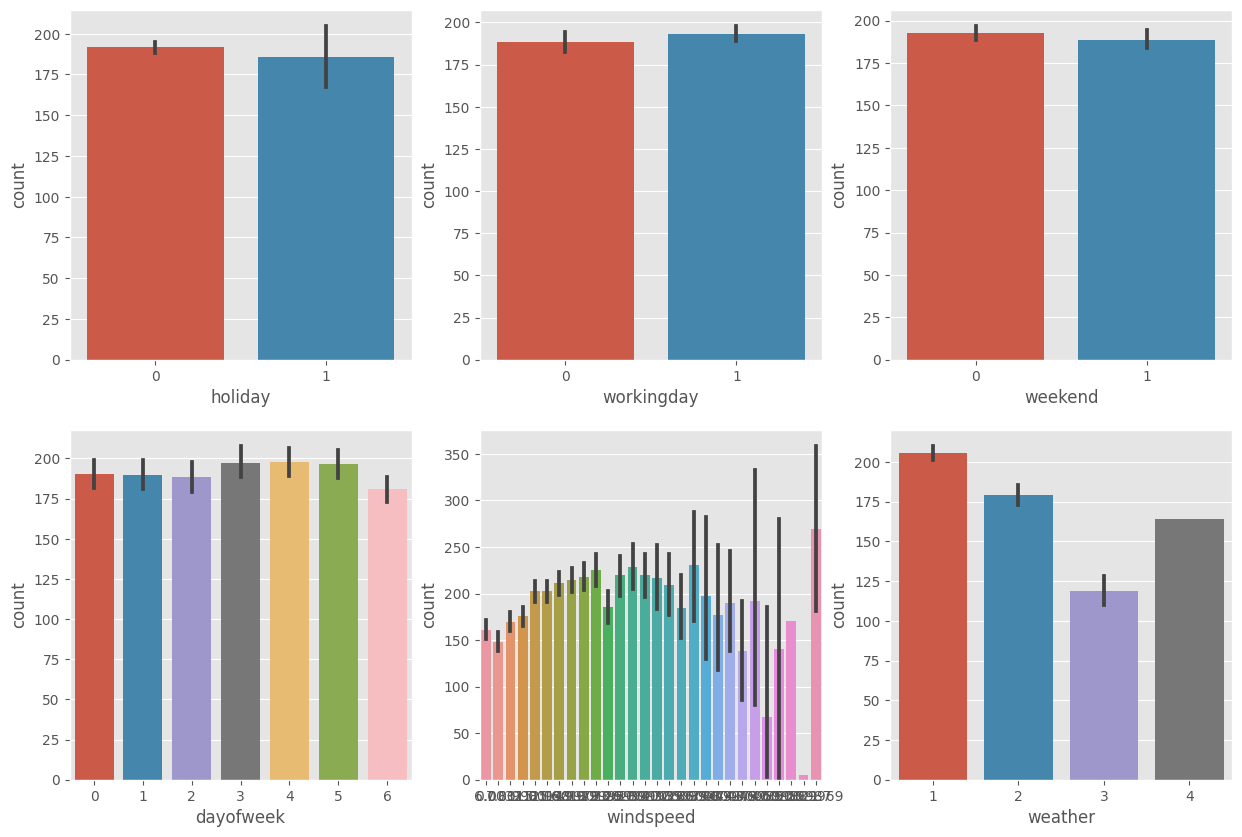

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(15,10)

sns.barplot(data=df_cat, y='count', x='holiday', orient='v', ax=ax1)
sns.barplot(data=df_cat, y='count', x='workingday', orient='v', ax=ax2)
sns.barplot(data=df_cat, y='count', x='weekend', orient='v', ax=ax3)
sns.barplot(data=df_cat, y='count', x='dayofweek', orient='v', ax=ax4)
sns.barplot(data=df_cat, y='count', x='windspeed', orient='v', ax=ax5)
sns.barplot(data=df_cat, y='count', x='weather', ax=ax6)

- holiday

In [ ]:
df_cat['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

- workingday

In [ ]:
df_cat['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

- weekend

In [ ]:
df_cat['weekend'].value_counts()

0    7723
1    3163
Name: weekend, dtype: int64

- dayofweek

In [ ]:
df_cat['dayofweek'].value_counts()

5    1584
6    1579
3    1553
0    1551
2    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

- weather

In [ ]:
df_cat['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [ ]:
df_cat[df_cat['weather'] == 4]

,workingday,hour,year,weekend,day,windspeed,count,season,month,weather,holiday,quarter,dayofweek
5631,1,18,2012,0,9,6.0032,164,1,1,4,0,1,0


In [ ]:
df_cat.groupby(['weather']).agg({'count':['count', 'max', 'min', 'mean', 'median']})

count                             
        count  max  min        mean median
weather                                   
1        7192  977    1  205.236791  161.0
2        2834  890    1  178.955540  134.0
3         859  891    1  118.846333   71.0
4           1  164  164  164.000000  164.0

<Axes: xlabel='second', ylabel='count'>

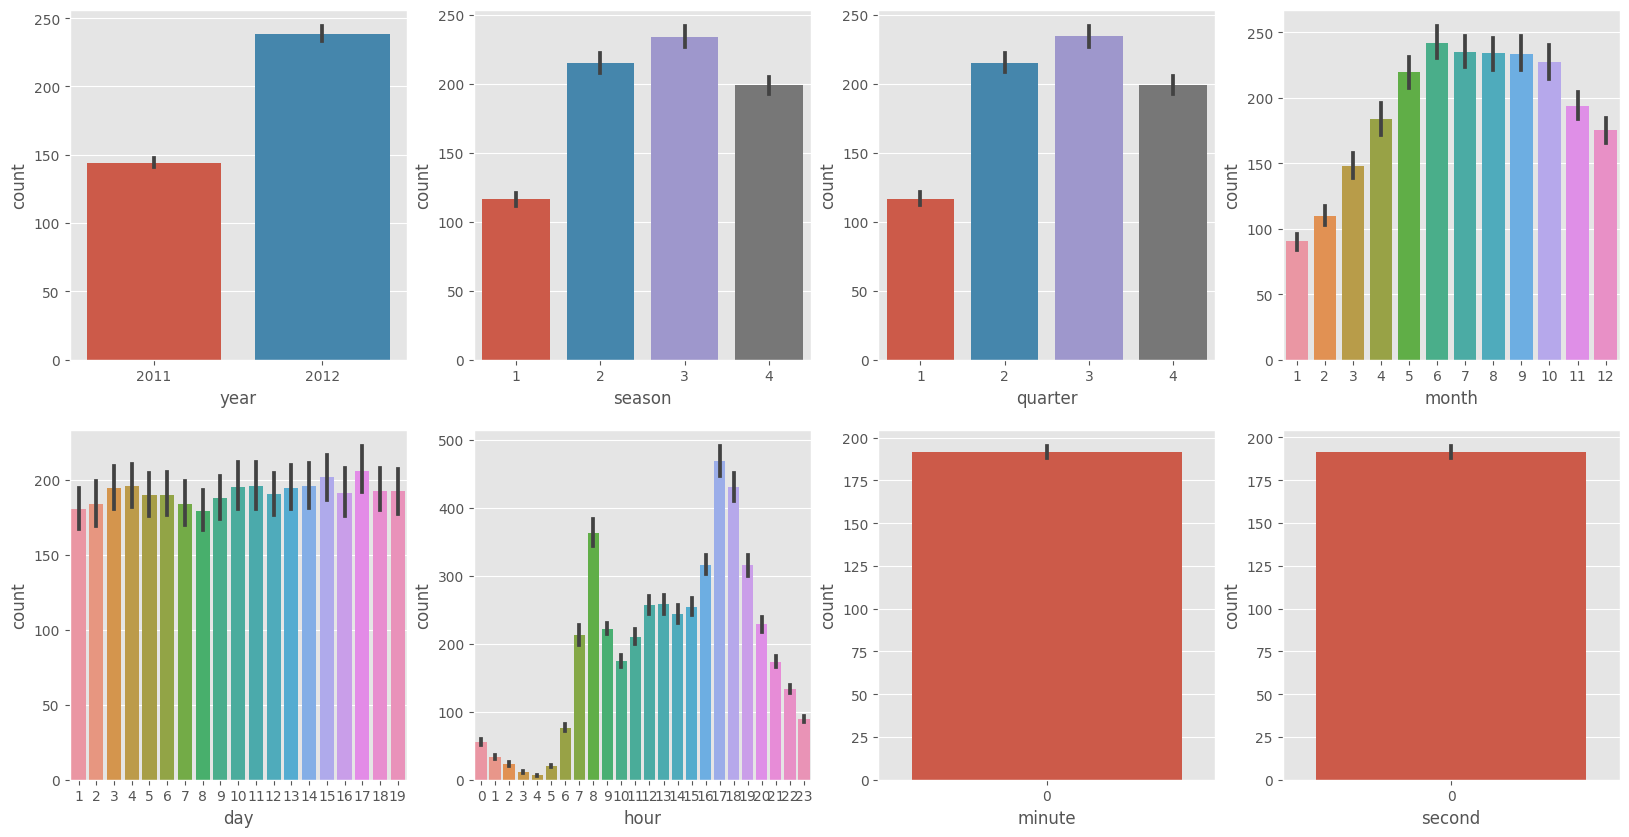

In [ ]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows=2, ncols=4)
fig.set_size_inches(15,10)

sns.barplot(data=df_cat, y='count', x='year', orient='v', ax=ax1)
sns.barplot(data=df_cat, y='count', x='season', orient='v', ax=ax2)
sns.barplot(data=df_cat, y='count', x='quarter', orient='v', ax=ax3)
sns.barplot(data=df_cat, y='count', x='month', orient='v', ax=ax4)
sns.barplot(data=df_cat, y='count', x='day', orient='v', ax=ax5)
sns.barplot(data=df_cat, y='count', x='hour', orient='v', ax=ax6)
sns.barplot(data=df_cat, y='count', x='minute', orient='v', ax=ax7)
sns.barplot(data=df_cat, y='count', x='second', orient='v', ax=ax8)

- season

In [ ]:
df_cat['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [ ]:
df_cat.groupby(['season']).agg({'count':['count', 'max', 'min', 'mean', 'median']})

count                            
       count  max min        mean median
season                                  
1       2686  801   1  116.343261   78.0
2       2733  873   1  215.251372  172.0
3       2733  977   1  234.417124  195.0
4       2734  948   1  198.988296  161.0

- quarter

In [ ]:
df_cat['quarter'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: quarter, dtype: int64

In [ ]:
df_cat.groupby(['quarter']).agg({'count':['count', 'max', 'min', 'mean', 'median']})

count                            
        count  max min        mean median
quarter                                  
1        2686  801   1  116.343261   78.0
2        2733  873   1  215.251372  172.0
3        2733  977   1  234.417124  195.0
4        2734  948   1  198.988296  161.0

<Axes: xlabel='month', ylabel='count'>

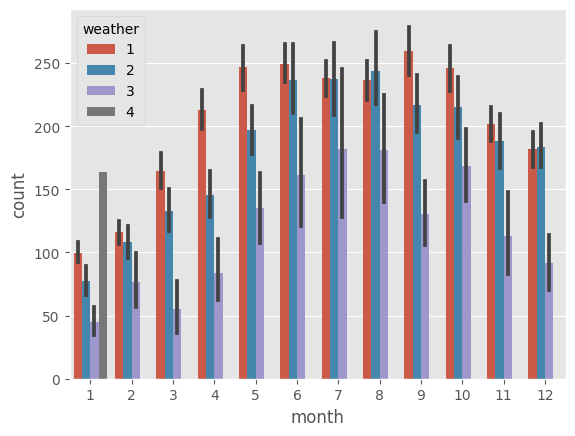

In [ ]:
# weather, month

sns.barplot(data=df_cat, y='count', x='month', hue='weather', orient='v')

<Axes: xlabel='workingday', ylabel='count'>

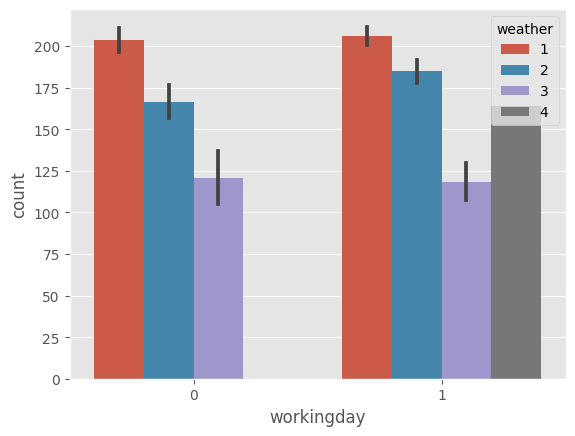

In [ ]:
sns.barplot(data=df_cat, y='count', x='workingday', hue='weather', orient='v') # holiday, workingday

<Axes: xlabel='hour', ylabel='count'>

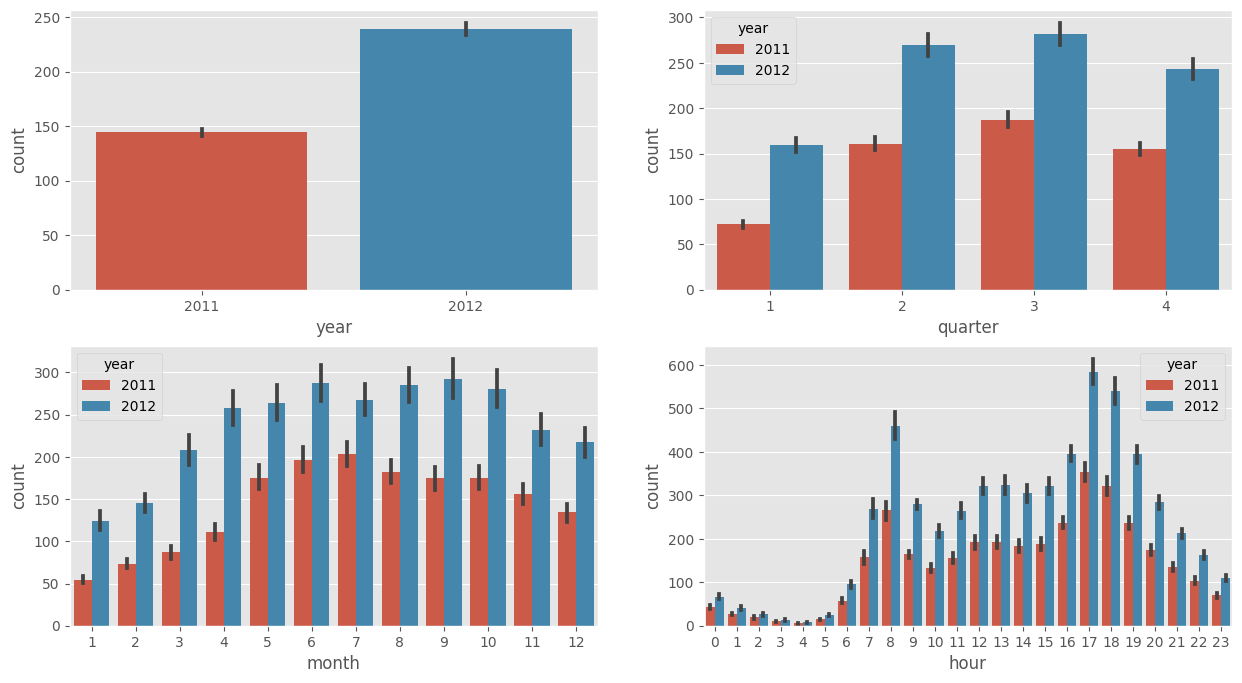

In [ ]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(15,8)

sns.barplot(data=train, x='year', y='count', ax=ax1) # 연도별 대여량
sns.barplot(data=train, x='quarter', y='count', hue='year', ax=ax2) # 분기별 대여량
sns.barplot(data=train, x='month', y='count', hue='year', ax=ax3) # 월별 대여량
sns.barplot(data=train, x='hour', y='count', hue='year', ax=ax4) # 시간별 대여량

<Axes: xlabel='hour', ylabel='count'>

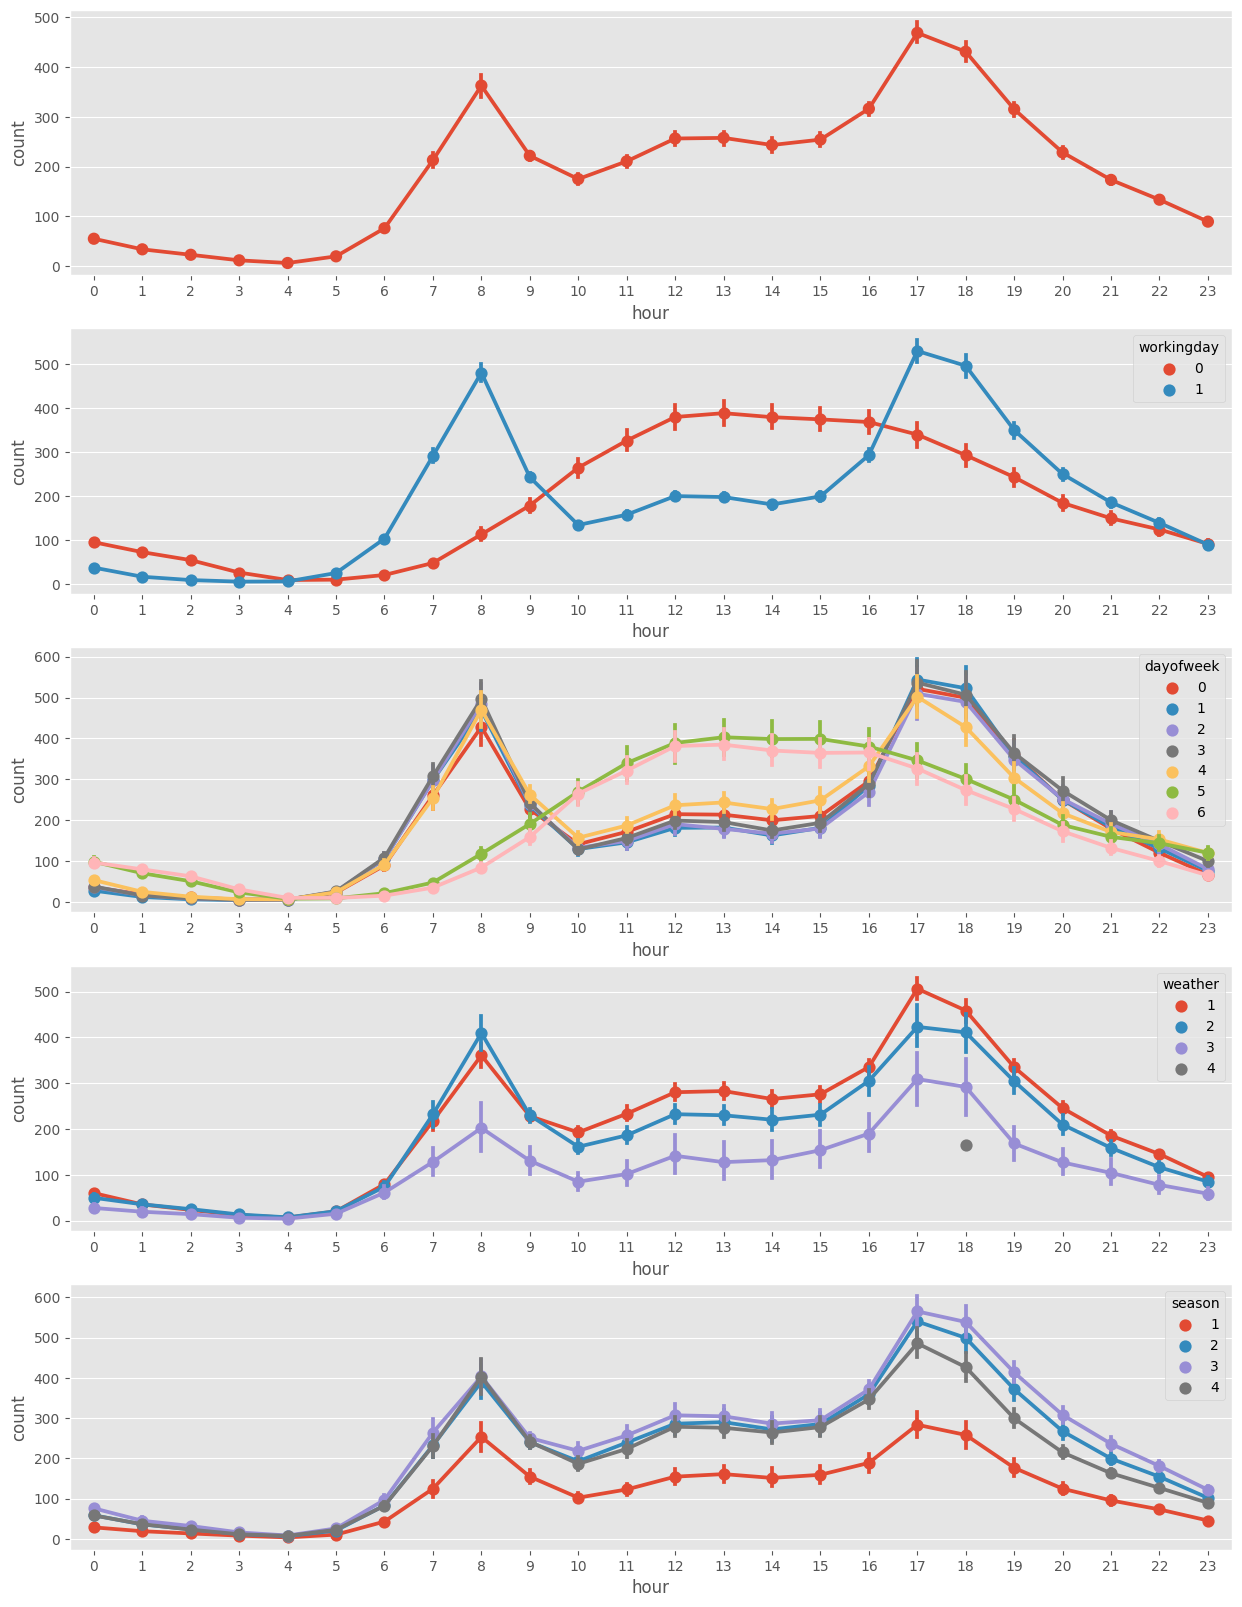

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5)
fig.set_size_inches(15,20)

sns.pointplot(data=df_cat, x='hour', y='count', ax=ax1)
sns.pointplot(data=df_cat, x='hour', y='count', hue='workingday', ax=ax2)
sns.pointplot(data=df_cat, x='hour', y='count', hue='dayofweek', ax=ax3)
sns.pointplot(data=df_cat, x='hour', y='count', hue='weather', ax=ax4)
sns.pointplot(data=df_cat, x='hour', y='count', hue='season', ax=ax5)

### 해석
- holiday, workingday, weekend
  - 서로 많이 비슷한 것 같음
  - workingday만 쓰자
- workingday값에 따라 사용 시간대가 달라짐
- 2011년도보다 2012년도가 사용량이 증가함
  - 하지만 사용 패턴은 비슷
- weather의 4는 데이터가 1개만 존재함.
  - 처리 필요
  - weather4인 경우에는 workiongday가 1인 경우이다.
- season, quarter
  - 동일한 데이터 같음
  - 삭제(month 2개월 단위 새로 만듬)
- month를 2개월 단위로 묶는 것이 좋을 것 같음
  - 겨울이 다른 계절보다 count가 적음
- hour
  - 출퇴근 시간에 많이 발생함(따로 변수 생성 필요)
- minute, second는 삭제 필요

# 이상치

<Axes: xlabel='workingday', ylabel='count'>

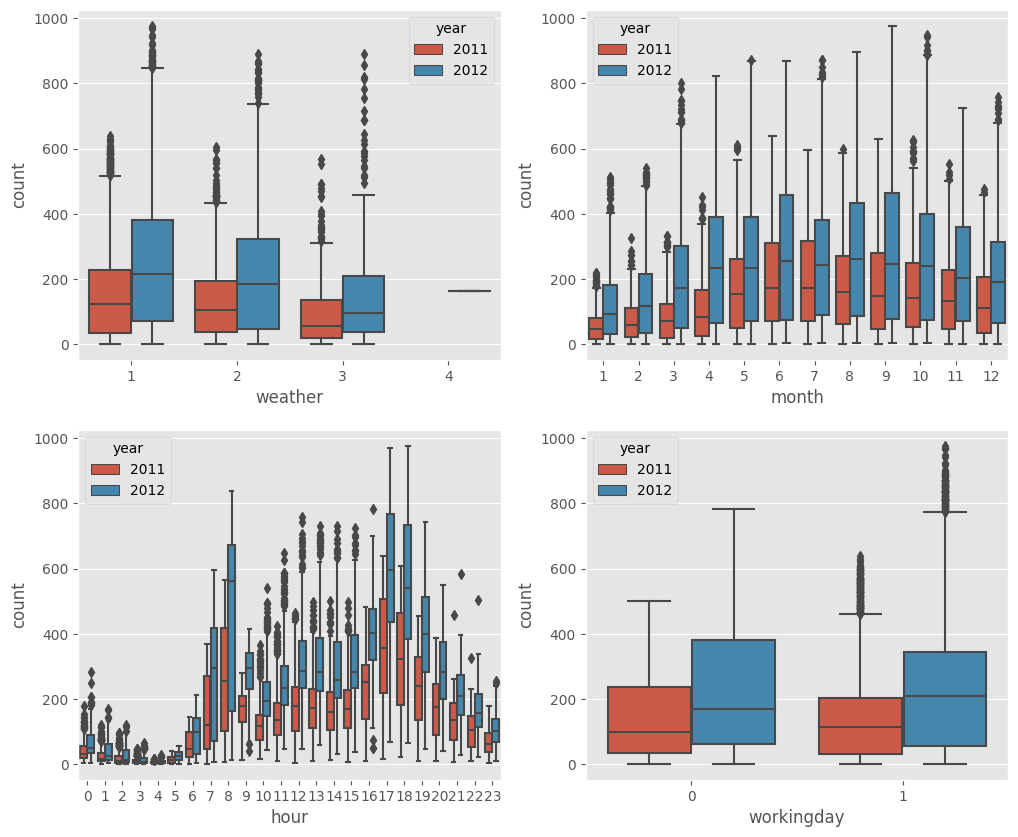

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12,10)

sns.boxplot(data=df_cat, y='count', x='weather', hue='year', orient='v', ax=ax1)
sns.boxplot(data=df_cat, y='count', x='month', hue='year', orient='v', ax=ax2)
sns.boxplot(data=df_cat, y='count', x='hour', hue='year', orient='v', ax=ax3)
sns.boxplot(data=df_cat, y='count', x='workingday', hue='year', orient='v', ax=ax4)

## 해석
전반적으로 이상치가 많이 발생함

# 상관관계

In [ ]:
df_corr = abs(train.drop(['minute', 'second'], axis=1).corr())
df_corr

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,dayofweek,quarter,hour,weekend
season,1.000000,0.029368,0.008126,0.008879,0.258689,0.264744,0.190610,0.147121,0.163439,0.004797,0.971524,0.001729,0.010553,1.000000,0.006546,0.002433
holiday,0.029368,1.000000,0.250491,0.007074,0.000295,0.005215,0.001929,0.008409,0.005393,0.012021,0.001731,0.015877,0.191832,0.029368,0.000354,0.109748
workingday,0.008126,0.250491,1.000000,0.033772,0.029966,0.024660,0.010880,0.013373,0.011594,0.002482,0.003394,0.009829,0.704267,0.008126,0.002780,0.934780
weather,0.008879,0.007074,0.033772,1.000000,0.055035,0.055376,0.406244,0.007261,0.128655,0.012548,0.012144,0.007890,0.047692,0.008879,0.022740,0.032078
temp,0.258689,0.000295,0.029966,0.055035,1.000000,0.984948,0.064949,0.017852,0.394454,0.061226,0.257589,0.015551,0.038466,0.258689,0.145430,0.030873
atemp,0.264744,0.005215,0.024660,0.055376,0.984948,1.000000,0.043536,0.057473,0.389784,0.058540,0.264173,0.011866,0.040235,0.264744,0.140343,0.023405
humidity,0.190610,0.001929,0.010880,0.406244,0.064949,0.043536,1.000000,0.318607,0.317371,0.078606,0.204537,0.011335,0.026507,0.190610,0.278011,0.010463
windspeed,0.147121,0.008409,0.013373,0.007261,0.017852,0.057473,0.318607,1.000000,0.101369,0.015221,0.150192,0.036157,0.024804,0.147121,0.146631,0.016816
count,0.163439,0.005393,0.011594,0.128655,0.394454,0.389784,0.317371,0.101369,1.000000,0.260403,0.166862,0.019826,0.002283,0.163439,0.400601,0.009925
year,0.004797,0.012021,0.002482,0.012548,0.061226,0.058540,0.078606,0.015221,0.260403,1.000000,0.004932,0.001800,0.003785,0.004797,0.004234,0.001862


<Axes: >

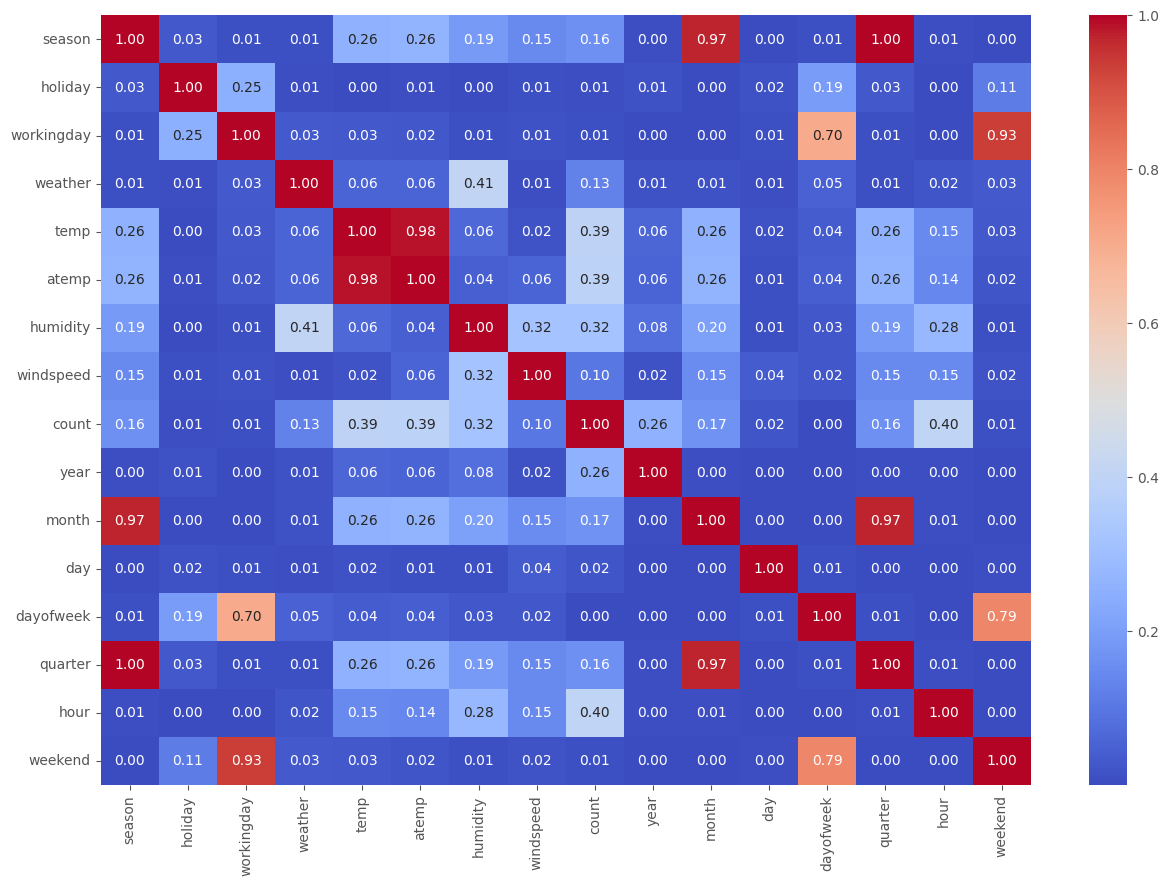

In [ ]:
plt.figure(figsize=(15,10))

sns.heatmap(df_corr, annot=True, fmt=".2f", cmap='coolwarm')

## 다중공선성

다중공선성 문제(Multicollinearity)는 통계학의 회귀분석에서 독립변수들 간에 강한 상관관계가 나타나는 문제이다. 적절한 회귀분석을 위해 해결해야 하는 문제가 된다.  

해결방법
  - 상관관계가 높은 독립변수 중 하나 혹은 일부를 제거
  - 변수를 변환

## 해석
- 당중공선성 문제가 발생할 수 있는 변수들이 다수 발견됨